# Video games sales

### Importing lib

In [1]:
#!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [2]:
dataset = pd.read_csv('Data.csv')

#### Reading and exploring data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
# Checks all the Dtype objects and how many unique in each column there is.
cat_vars = [var for var in dataset.columns if dataset[var].dtypes == 'O'] 
dataset[cat_vars].nunique()

Name          11562
Platform         31
Genre            12
Publisher       581
User_Score       96
Developer      1696
Rating            8
dtype: int64

### Data preparation


#### There are ~17k games, but some of the data is missing
#### 1. Adding missing manufacturer of the platforms
#### 2. User_Score has string that needs to change
#### 3. Renaming columns for ease of use
#### 4. Droping games without a year of release and column, Name, Rating, Genre

In [5]:
#Note to self do not remove nan before doing this.
# create new column to regroup the Platform by manufacturers
def newPlatform(x):
    sony = {'PS','PS2','PS3','PS4' ,'PSP','PSV'}
    microsoft = {'PC','X360','XB','XOne'}
    nintendo = {'3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU'}
    sega = {'DC','SAT','GG','GEN','SCD'} 
    other = {'2600', '3DO', 'WS', 'NG', 'TG16', 'PCFX'}
    other2 = {2600}
    
    if x in sony:
        return('Sony')
    elif x in microsoft: 
        return('Microsoft')
    elif x in nintendo: 
        return('Nintendo')
    elif x in sega: 
        return('Sega')
    elif x in other2: 
        return('Other')
    elif x in other: 
        return('Other')
    else:
        return('Other')
    
manufacturer = pd.Series([],dtype=pd.StringDtype())
for i in range(len(dataset)): 
    valueIn = newPlatform(str(dataset["Platform"][i]))
    manufacturer[i] = valueIn
    
dataset.insert (2, "Manufactur", manufacturer)    

In [6]:
# This is so we can se how many uniqe values there is in every column that is not a float/int.
dataset["User_Score"] = dataset["User_Score"].replace("tbd", np.nan).astype(float)
dataset["Developer"] = dataset["Developer"].replace(np.nan, "Other", regex=True)
cat_vars = [var for var in dataset.columns if dataset[var].dtypes == 'O'] 
dataset[cat_vars].nunique() 

Name          11562
Platform         31
Manufactur        5
Genre            12
Publisher       581
Developer      1697
Rating            8
dtype: int64

In [7]:
dataset.head()

,Name,Platform,Manufactur,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,Nintendo,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,Nintendo,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,Other,NaN
2,Mario Kart Wii,Wii,Nintendo,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,Nintendo,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,Nintendo,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,Other,NaN


In [8]:
# This is to rename the columnas tho make it easyer to write them
dataset = dataset.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
# ignore the rows that has nan values in columns below and change Year column to int
dataset = dataset[dataset["Year"].notnull()] 
dataset["Year"] = dataset["Year"].apply(int)
dataset = dataset.drop(['Name', 'Genre', 'Rating'], axis=1)
dataset.info() # This is to ceck that index 0 - 10 has the same non-null Counts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      16450 non-null  object 
 1   Manufactur    16450 non-null  object 
 2   Year          16450 non-null  int64  
 3   Publisher     16418 non-null  object 
 4   NA            16450 non-null  float64
 5   EU            16450 non-null  float64
 6   JP            16450 non-null  float64
 7   Other         16450 non-null  float64
 8   Global        16450 non-null  float64
 9   Critic_Score  7983 non-null   float64
 10  Critic_Count  7983 non-null   float64
 11  User_Score    7463 non-null   float64
 12  User_Count    7463 non-null   float64
 13  Developer     16450 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 1.9+ MB


In [12]:
# Remove NaN values and save with No_Critics
dataset1 = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,13]].copy() 
dataset1 = dataset1.dropna(axis=0)
dataset1.to_csv('Data_No_critics.csv', index=False)
dataset1

,Platform,Manufactur,Year,Publisher,NA,EU,JP,Other,Global,Developer
0,Wii,Nintendo,2006,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,NES,Nintendo,1985,Nintendo,29.08,3.58,6.81,0.77,40.24,Other
2,Wii,Nintendo,2008,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii,Nintendo,2009,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,GB,Nintendo,1996,Nintendo,11.27,8.89,10.22,1.00,31.37,Other
...,...,...,...,...,...,...,...,...,...,...
16714,PS3,Sony,2016,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,Other
16715,X360,Microsoft,2006,Codemasters,0.00,0.01,0.00,0.00,0.01,Other
16716,PSV,Sony,2016,Idea Factory,0.00,0.00,0.01,0.00,0.01,Other
16717,GBA,Nintendo,2003,Wanadoo,0.01,0.00,0.00,0.00,0.01,Other


In [13]:
# Remove NaN values and save with Critics
dataset2 = dataset.dropna(axis=0)
dataset2.to_csv('Data_With_critics.csv', index=False)
dataset2

,Platform,Manufactur,Year,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,Nintendo,2006,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo
2,Wii,Nintendo,2008,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo
3,Wii,Nintendo,2009,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo
6,DS,Nintendo,2006,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo
7,Wii,Nintendo,2006,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,GBA,Nintendo,2002,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games
16696,PC,Microsoft,2014,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions
16700,PC,Microsoft,2011,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games
16706,PC,Microsoft,2011,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin


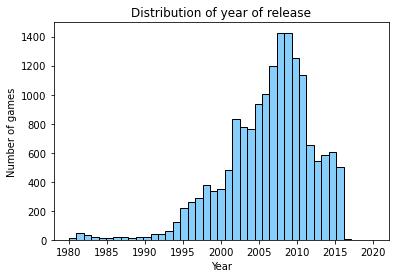

In [14]:
# Display distribution of year of release *how many games were released / year.
num_years = dataset["Year"].max() - dataset["Year"].min() + 1
plt.hist(dataset["Year"], bins=num_years, color="lightskyblue", edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year")
plt.ylabel("Number of games");

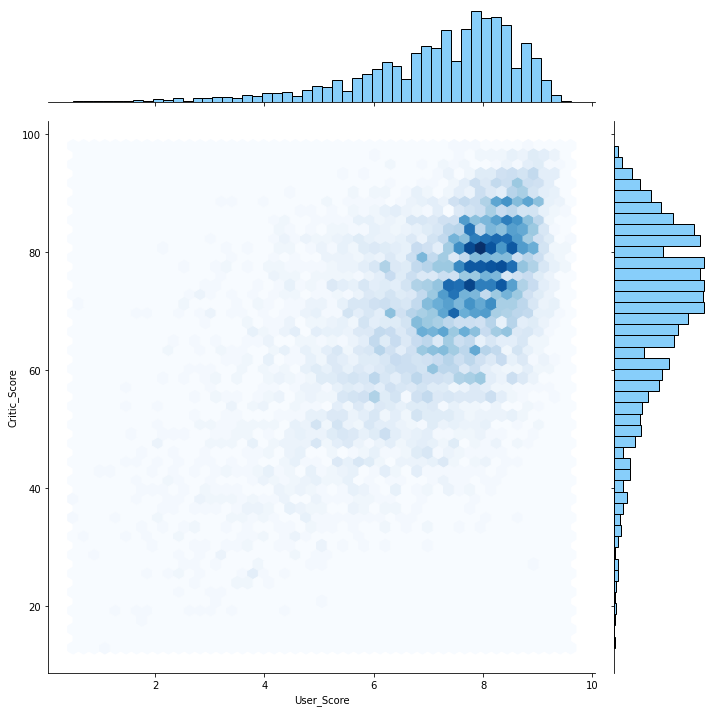

In [15]:
g = sns.jointplot(x="User_Score", y="Critic_Score", data=dataset, cmap="Blues", kind="hex", 
                  height=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}}, 
                  annot_kws={"loc": 4, "fontsize": 18});
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False);

In [16]:
sales = dataset[['Manufactur','NA','EU','JP','Other']].copy()
sales2 = sales.groupby(['Manufactur'])[['NA','EU','JP','Other']].sum()

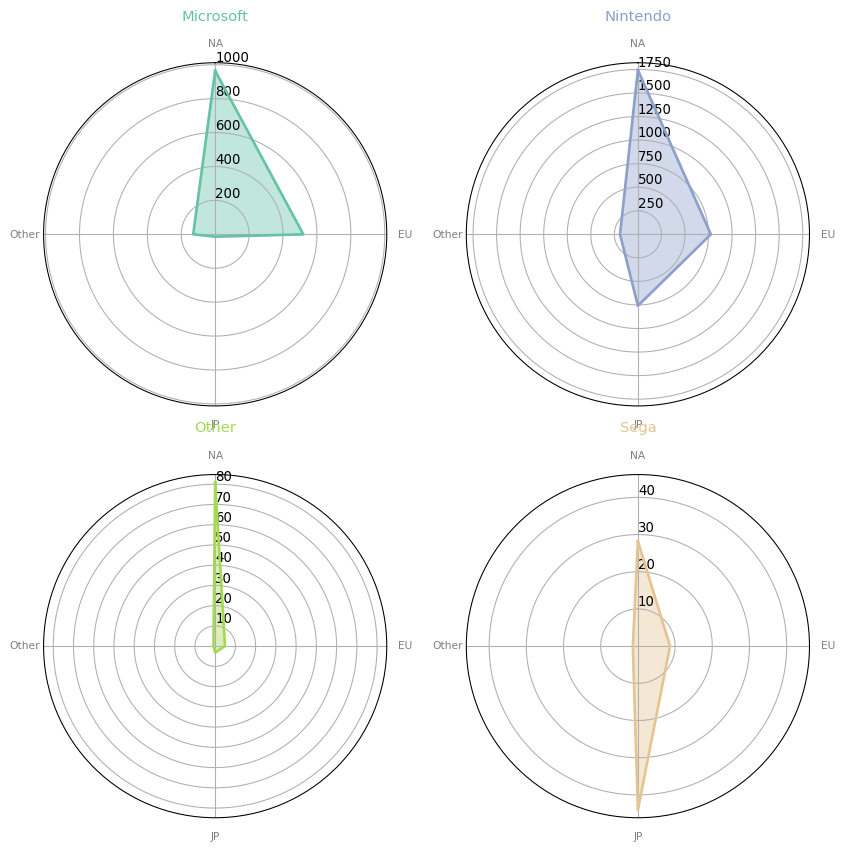

In [17]:

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
# number of variable
    categories=list(sales2)[:]
    N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
# Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )
 
# If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    #plt.ylim(0,40)
 
# Ind1
    values=sales2.iloc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
# Add a title
    plt.title(title, size=11, color=color, y=1.1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
manufac = ['Microsoft', 'Nintendo', 'Other', 'Sega', 'Sony']
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(sales2.index))
 
# Loop to plot
for row in range(0, len(sales2.index)-1):
    make_spider( row=row, title=manufac[row], color=my_palette(row))


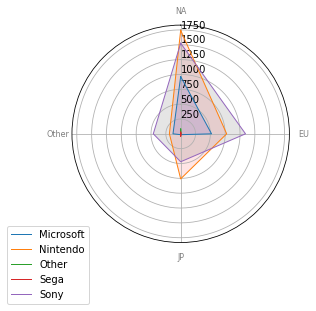

In [18]:
# ------- PART 1: Create background
 
# number of variable
categories=list(sales2)[:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
#plt.yticks(color="grey", size=7)
#plt.ylim(0,1740)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=sales2.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Microsoft")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=sales2.iloc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Nintendo")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Ind3
values=sales2.iloc[2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Other")
ax.fill(angles, values, 'g', alpha=0.1)
# Ind4
values=sales2.iloc[3].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Sega")
ax.fill(angles, values, 'm', alpha=0.1)
# Ind5
values=sales2.iloc[4].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Sony")
ax.fill(angles, values, 'k', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))